<center> <h2> Portfolio Project #2 </h2> </center>  
<center> <h3> Perform RFM and Association on Superstore Data <h3> </center>

<h2>Objective</h2>

To optimize sales and customer satisfaction,I will conduct RFM and Market Basket Analysis to identify product associations in customer orders. By uncovering which products are frequently purchased together, my aim to enhance cross-selling, inventory management, and personalized marketing strategies, ultimately increasing sales and customer experience

<h2> Importing Files and Libraries</h2>

**i. Import Required libraries and Data File**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline

In [5]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**ii. Read Excel file**

In [6]:
df = pd.read_excel("Online Retail.xlsx")

In [8]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

- **BillNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- **Itemname:** Product (item) name. Nominal.
- **Quantity:** The quantities of each product (item) per transaction. Numeric.
- **Date:** Invoice Date and time. Numeric, the day and time when each transaction was generated.
- **Price:** Unit price. Numeric, Product price per unit in sterling.
- **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- **Country:** Country name. Nominal, the name of the country where each customer resides.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
print("Number of rows in dataset is: ", df.shape[0])
print("Number of columns in dataset is: ", df.shape[1])

Number of rows in dataset is:  541909
Number of columns in dataset is:  8


<h2> Data Preprocessing</h2>


In [12]:
print('Duplicate entries: {}'.format(df.duplicated().sum()))
print('{}% rows are duplicate.'.format(round((df.duplicated().sum()/df.shape[0])*100),2))
#Remove duplicate data
df.drop_duplicates(inplace = True)

Duplicate entries: 5268
1% rows are duplicate.


In [14]:
df['Customer ID'] = df['CustomerID'].astype(str)

In [15]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,536641.000000,536641,536641.000000,401604.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,15281.160818
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,13939.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,15145.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,219.130156,NaN,97.233118,1714.006089


In [18]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].unique().tolist()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,4070,25900,4373


In [19]:
cancelled = df['InvoiceNo'].astype(str).str.contains('C')
cancelled.fillna(0, inplace=True)
cancelled = cancelled.astype(int)
cancelled.value_counts()

InvoiceNo
0    527390
1      9251
Name: count, dtype: int64

In [20]:
df['order_canceled'] = cancelled
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Customer ID,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,0


In [21]:
n1 = df['order_canceled'].value_counts()[1]
n2 = df.shape[0]
print("Number of cancelled transactions:", n1)
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))
df = df[df['order_canceled'] == 0]

Number of cancelled transactions: 9251
Number of orders canceled: 9251/536641 (1.72%) 


In [22]:
df = df[df['Customer ID'].notna()]

In [27]:
print("Total number of transaction with negative quantity:", df[df['Quantity'] <= 0 ]['Quantity'].count())
print("Precentage of transactions with zero or negative quantity" ,round(len(df[df['Quantity']<=0])/len(df)*100, 2),"%")
print("Total number of transaction with negative Price:", df[df['UnitPrice'] <= 0 ]['UnitPrice'].count())
print("Precentage of transactions with zero or negative price" ,round(len(df[df['UnitPrice']<=0])/len(df)*100, 2),"%")

Total number of transaction with negative quantity: 1336
Precentage of transactions with zero or negative quantity 0.25 %
Total number of transaction with negative Price: 2512
Precentage of transactions with zero or negative price 0.48 %


In [32]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

0



<h2> Exploratory Data Analysis</h2>


In [34]:
# Calculate revenue by multiplying 'Quantity' and 'Price' columns
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Print the cleaned DataFrame with the new 'Revenue' column
print("Cleaned DataFrame with Revenue Column:")
df.head()

Cleaned DataFrame with Revenue Column:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Customer ID,order_canceled,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,0,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12680.0,0,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12680.0,0,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12680.0,0,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12680.0,0,16.60


**Question:**
How many distinct customers, identified by their 'CustomerID,' are there in our dataset?


In [35]:
# Calculate the number of unique customers (unique CustomerIDs)
unique_customers_count = df['Customer ID'].nunique()

# Print the result professionally
print("Number of Distinct Customers (CustomerIDs):", unique_customers_count)

Number of Distinct Customers (CustomerIDs): 4340


**Question:**
How many distinct orders, identified by their 'InvoiceNo,' are there in our dataset?

In [36]:
# Calculate the number of unique orders (unique InvoiceNos)
unique_orders_count = df['InvoiceNo'].nunique()

# Print the result professionally
print("Number of Distinct Orders (InvoiceNos):", unique_orders_count)

Number of Distinct Orders (InvoiceNos): 22064


**Question:** 
how many unique desription we have?

In [37]:
# Calculate the number of unique descriptions (unique Description values)
unique_Item_count = df['Description'].nunique()

# Print the result
print("Number of Unique Items:", unique_Item_count)

Number of Unique Items: 4207


**Question:**
How many quantity sold?

In [38]:
# Calculate the total quantity sold
total_quantity_sold = df['Quantity'].sum()

# Print the result
print("Total Quantity Sold:", total_quantity_sold)

Total Quantity Sold: 5438062


**Question:** 
Average Quantity Sold?

In [39]:
# Calculate the average quantity sold
average_quantity_sold = df['Quantity'].mean()

# Print the result
print("Average Quantity Sold:", average_quantity_sold)

Average Quantity Sold: 10.31127249284211


**Question:**
what are the range of of the date in this data “invoice date”

In [40]:
# Convert the "Date" column to a datetime data type if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Find the minimum and maximum dates
min_date = df['InvoiceDate'].min()
max_date = df['InvoiceDate'].max()

# Calculate the number of days in the date range
date_range_days = (max_date - min_date).days

# Extract the years from the date range
start_year = min_date.year
end_year = max_date.year

# Print the results
print("Date Range (InvoiceDate):")
print("Start Date:", min_date)
print("End Date:", max_date)
print("Number of Days in the Range:", date_range_days, "days")
print("Years Included in the Range:", start_year, "to", end_year)

Date Range (InvoiceDate):
Start Date: 2010-12-01 08:26:00
End Date: 2011-12-09 12:50:00
Number of Days in the Range: 373 days
Years Included in the Range: 2010 to 2011


**Question:**
Since we played with date let's add some columns related to date for more analysis later

In [43]:
# Extract year, month, and day from the "InvoiceDate" column
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

# Create a column for the day of the week (in words)
df['DayOfWeek'] = df['InvoiceDate'].dt.strftime('%A')

# Create a column for "year-month"
df['YearMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')

# Print the DataFrame with the new columns
print("DataFrame with New Date Columns:")
df.head()

DataFrame with New Date Columns:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Customer ID,order_canceled,Revenue,Year,Month,Day,DayOfWeek,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0,0,15.30,2010,12,1,Wednesday,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,0,20.34,2010,12,1,Wednesday,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0,0,22.00,2010,12,1,Wednesday,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,0,20.34,2010,12,1,Wednesday,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,0,20.34,2010,12,1,Wednesday,2010-12


In [44]:
# Count the occurrences of each day of the week
day_of_week_counts = df['DayOfWeek'].value_counts().reset_index()
day_of_week_counts.columns = ['DayOfWeek', 'Count']

# Sort the DataFrame by day of the week
day_of_week_counts = day_of_week_counts.sort_values(by=['Count'],ascending=False)

# Print the count of orders for each day in order
print("Count of Orders for Each Day of the Week:")
print(day_of_week_counts)

Count of Orders for Each Day of the Week:
   DayOfWeek   Count
0   Thursday  100708
1    Tuesday   99322
2     Monday   92821
3  Wednesday   91987
4     Friday   80208
5     Sunday   62344


In [45]:
# Calculate the average unit price
average_price = df['UnitPrice'].mean()

# Print the result
print("Average Unit Price:", average_price)

Average Unit Price: 3.8619388384307625


In [46]:
# Calculate the maximum and minimum unit prices
max_unit_price = df['UnitPrice'].max()
min_unit_price = df['UnitPrice'].min()

# Print the results
print("Maximum Unit Price:", max_unit_price)
print("Minimum Unit Price:", min_unit_price)

Maximum Unit Price: 13541.33
Minimum Unit Price: -11062.06


**Question:**
what is the countries that we sell too?

In [47]:
# Calculate the number of unique countries
unique_countries_count = df['Country'].nunique()

# Print the count of unique countries
print("Number of Unique Countries We Sell To:",unique_countries_count)

Number of Unique Countries We Sell To: 38


**Question:**
Total Revenue for each country

In [49]:
# Calculate the total revenue for each country
country_revenue = df.groupby('Country')['Revenue'].sum().reset_index()

# Calculate the percentage of revenue for each country
total_revenue = country_revenue['Revenue'].sum()
country_revenue['Percentage_of_Revenue'] = (country_revenue['Revenue'] / total_revenue) * 100

# Sort the results by percentage of revenue in descending order
country_revenue = country_revenue.sort_values(by='Percentage_of_Revenue', ascending=False)

# Print the countries responsible for the most percentage of revenue
print("Countries Responsible for the Most Percentage of Revenue:")
#print(country_revenue[['Country', 'Percentage_of_Revenue']])
country_revenue

Countries Responsible for the Most Percentage of Revenue:


,Country,Revenue,Percentage_of_Revenue
36,United Kingdom,8979619.974,84.553966
24,Netherlands,285446.340,2.687822
10,EIRE,283140.520,2.666110
14,Germany,228678.400,2.153283
13,France,209625.370,1.973876
0,Australia,138453.810,1.303710
31,Spain,61558.560,0.579648
33,Switzerland,57067.600,0.537360
3,Belgium,41196.340,0.387913
32,Sweden,38367.830,0.361279


In [50]:
total_rev=df["Revenue"].sum()
print("The total Revenue is:$",total_rev)

The total Revenue is:$ 10619986.683999998


Most Ordered Item per Invoice:
       InvoiceNo                        Description  Quantity
518984    581483        PAPER CRAFT , LITTLE BIRDIE     80995
59171     541431     MEDIUM CERAMIC TOP STORAGE JAR     74215
482306    578841     ASSTD DESIGN 3D PAPER STICKERS     12540
405442    573008  WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800
198118    554868               SMALL POPCORN HOLDER      4300


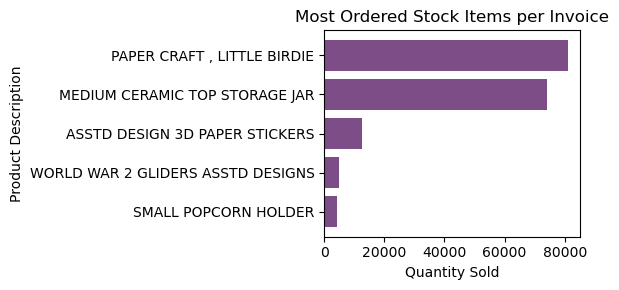

In [51]:

# Group by 'InvoiceNo' and find the stock item with the highest total quantity ordered per invoice
most_ordered_per_invoice = df.groupby(['InvoiceNo',"Description"])['Quantity'].sum().reset_index()
most_ordered_per_invoice = most_ordered_per_invoice.sort_values(by=['Quantity'], ascending=[False])
most_ordered_per_invoice = most_ordered_per_invoice.drop_duplicates(subset='InvoiceNo', keep='first').head(5)

# Print the result
print("Most Ordered Item per Invoice:")
print(most_ordered_per_invoice[['InvoiceNo',"Description", 'Quantity']])


colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
# Plotting
plt.figure(figsize=(6, 3))
plt.barh(most_ordered_per_invoice['Description'], most_ordered_per_invoice['Quantity'], color=colors, alpha=0.7)
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.title('Most Ordered Stock Items per Invoice')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top item at the top
plt.tight_layout()
plt.savefig("Most Ordered Stock Items per Invoice")

# Display the plot
plt.show()

In [52]:
# Group by 'InvoiceNo' and 'Itemname', and find the total quantity ordered for each combination
Item_quantities_per_invoice = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().reset_index()

# Sort the data by 'BillNo' and quantity in descending order
Item_quantities_per_invoice = Item_quantities_per_invoice.sort_values(by=['Quantity'], ascending=[False])

# Get the top 10 Items per invoice using groupby and head
top_10_Items_per_invoice = Item_quantities_per_invoice.groupby('InvoiceNo').head(10)

# Print the result
print("Top 10 Items per Invoice:")
print(top_10_Items_per_invoice[['InvoiceNo', 'Description', 'Quantity']])
top_10_Items_per_invoice



Top 10 Items per Invoice:
       InvoiceNo                        Description  Quantity
518984    581483        PAPER CRAFT , LITTLE BIRDIE     80995
59171     541431     MEDIUM CERAMIC TOP STORAGE JAR     74215
482306    578841     ASSTD DESIGN 3D PAPER STICKERS     12540
405442    573008  WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800
198118    554868               SMALL POPCORN HOLDER      4300
...          ...                                ...       ...
414826    573596             Unsaleable, destroyed.     -4830
111224    546152                         throw away     -5368
216845    556687       Printing smudges/thrown away     -9058
216846    556690       printing smudges/thrown away     -9600
216847    556691       printing smudges/thrown away     -9600

[160620 rows x 3 columns]


,InvoiceNo,Description,Quantity
518984,581483,"PAPER CRAFT , LITTLE BIRDIE",80995
59171,541431,MEDIUM CERAMIC TOP STORAGE JAR,74215
482306,578841,ASSTD DESIGN 3D PAPER STICKERS,12540
405442,573008,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800
198118,554868,SMALL POPCORN HOLDER,4300
...,...,...,...
414826,573596,"Unsaleable, destroyed.",-4830
111224,546152,throw away,-5368
216845,556687,Printing smudges/thrown away,-9058
216846,556690,printing smudges/thrown away,-9600


In [53]:
# Here to check if all BillNo doesn't inculde letters 
df['InvoiceNo'].astype("int64")

ValueError: invalid literal for int() with base 10: 'A563185'

In [54]:
# Grouping countries by TotalAmount of sales

country_price = df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_price

Country
United Kingdom          4511372
Netherlands              200937
EIRE                     147281
Germany                  119156
France                   112061
Australia                 84199
Sweden                    36078
Switzerland               30618
Spain                     27944
Japan                     26016
Belgium                   23237
Norway                    19338
Portugal                  16231
Finland                   10704
Channel Islands            9485
Denmark                    8235
Italy                      8112
Cyprus                     6340
Singapore                  5241
Austria                    4881
Hong Kong                  4713
Israel                     4406
Poland                     3684
Unspecified                3295
Canada                     2763
USA                        2458
Iceland                    2458
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671


<Figure size 100x300 with 0 Axes>

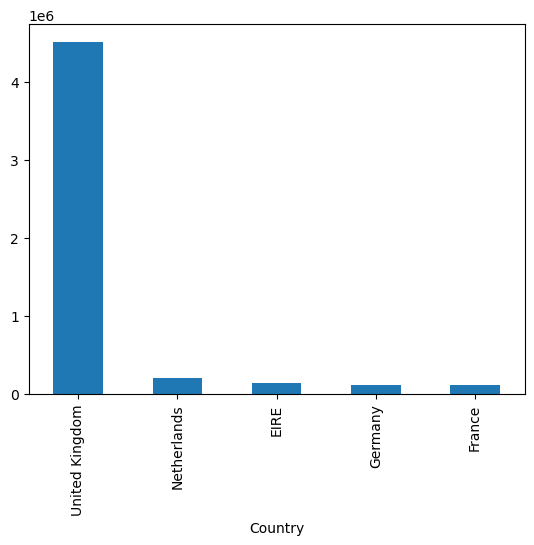

<Figure size 100x300 with 0 Axes>

In [65]:
# Top 5 Companies with high number of purchase
country_price[:5].plot(kind = 'bar')
plt.figure(figsize=(1, 3))
#plt.barh(most_ordered_per_invoice['Description'], most_ordered_per_invoice['Quantity'], color=colors, alpha=0.7)


Text(0.5, 0, 'Date (Month)')

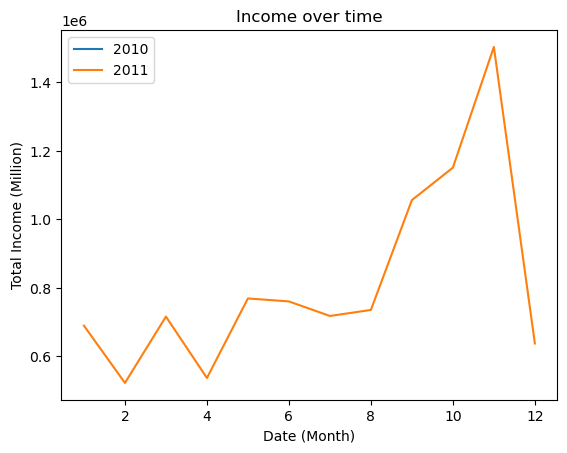

In [66]:
# Grouping the data by month and summing the total price for the year 2010
df[df["InvoiceDate"].dt.year == 2010].groupby(df["InvoiceDate"].dt.month)["Revenue"].sum().plot()

# Grouping the data by month and summing the total price for the year 2011
df[df["InvoiceDate"].dt.year == 2011].groupby(df["InvoiceDate"].dt.month)["Revenue"].sum().plot()

# Adding legend and plot labels
plt.legend(["2010", "2011"])
plt.title("Income over time")
plt.ylabel('Total Income (Million)')
plt.xlabel("Date (Month)")

In [67]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

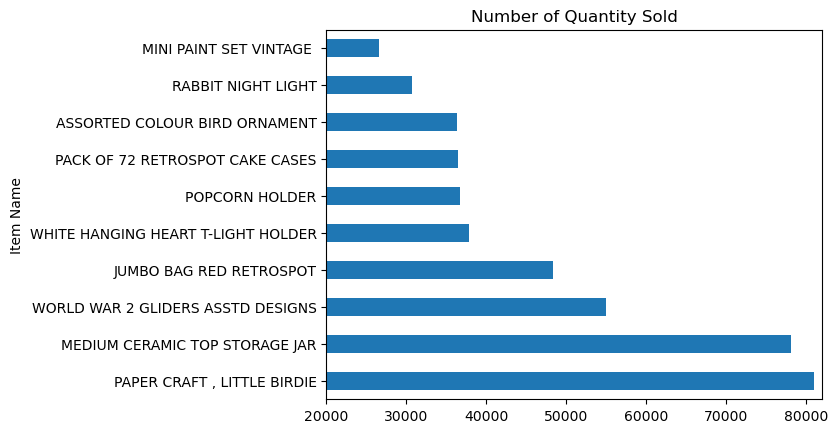

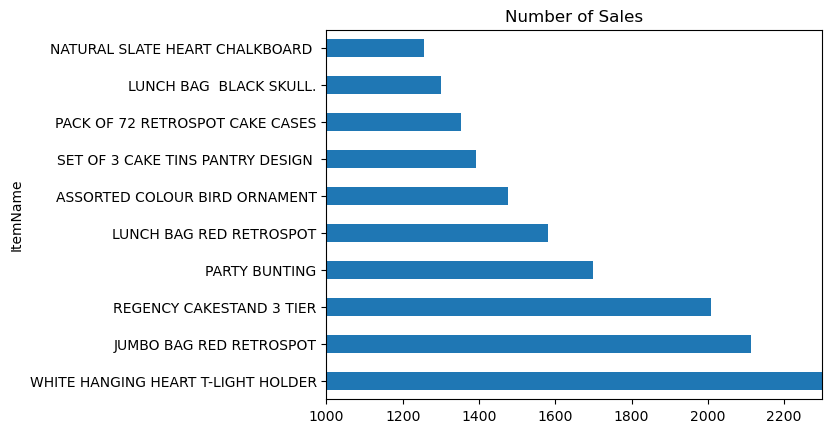

In [68]:
# Plotting the top 10 most sold products by quantity
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='barh', title='Number of Quantity Sold')
plt.ylabel('Item Name')
plt.xlim(20000, 82000)
plt.show()

# Plotting the top 10 most sold products by count
df['Description'].value_counts(ascending=False)[:10].plot(kind='barh', title='Number of Sales')
plt.ylabel('ItemName')
plt.xlim(1000, 2300)
plt.show()

<Axes: xlabel='Year'>

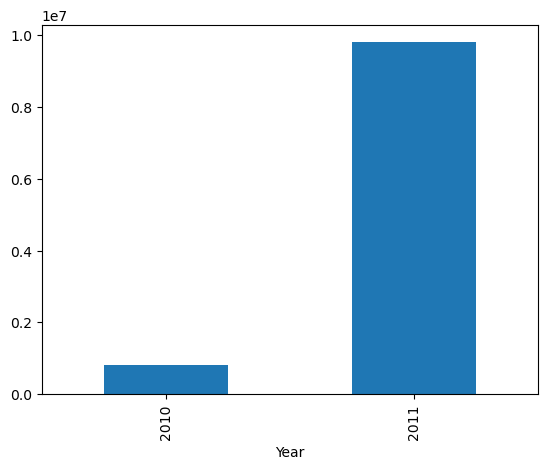

In [69]:
# Total sales for different years

df.groupby('Year')['Revenue'].sum().plot(kind = 'bar')

<Axes: title={'center': 'Sales month wise'}, xlabel='Mon,Year'>

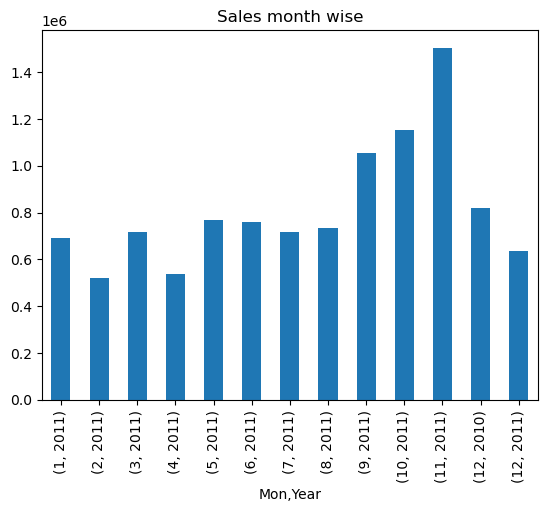

In [71]:
# Sales for different months

df['Mon'] = df['InvoiceDate'].dt.month
df['month'] = df['InvoiceDate'].dt.month_name() 
df.groupby(['Mon','Year'])['Revenue'].sum().plot(kind = 'bar', title = 'Sales month wise')

# Answer :
### Performance Analysis

Sales Performance can be seen with 
1. Number of sales every month
2. Number of sales every year

1. We see that in 2010 we have sales only for dec and in 2011 we have sales for all months
2. We can see that from September to Novembor we have very good sales
3. We could see that DEC 2010 we have sales of 748957 and in DEC 2011 we have sales of 433668 which is a huge drop when analyzed further found out that We have only data upto 9th on dec 2011, so we find a sales drop in the month of dec 2011

In [72]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Customer ID,order_canceled,Revenue,Year,Month,Day,DayOfWeek,YearMonth,Mon,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,17850.0,0,15.30,2010,12,1,Wednesday,2010-12,12,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,0,20.34,2010,12,1,Wednesday,2010-12,12,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,17850.0,0,22.00,2010,12,1,Wednesday,2010-12,12,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,0,20.34,2010,12,1,Wednesday,2010-12,12,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,17850.0,0,20.34,2010,12,1,Wednesday,2010-12,12,December


<Axes: title={'center': 'Most Customers for country'}, xlabel='Country'>

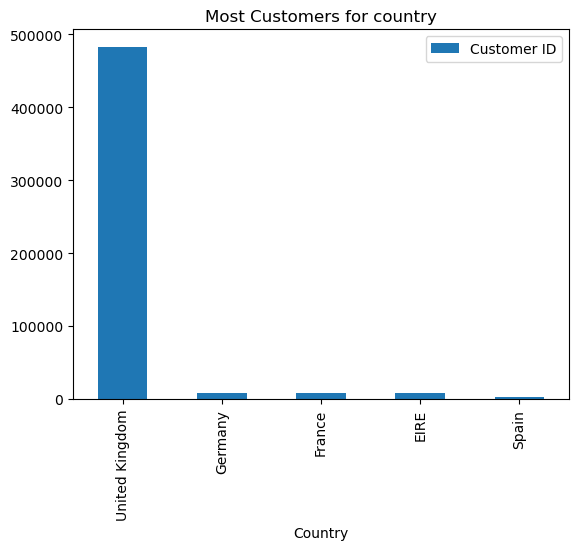

In [73]:
#Countries with more number of customers
cus_id = pd.DataFrame(df.groupby('Country')['Customer ID'].count().sort_values(ascending = False))
cus_id[:5].plot(kind = 'bar', title = 'Most Customers for country')

<Axes: title={'center': 'Least customers for country'}, xlabel='Country'>

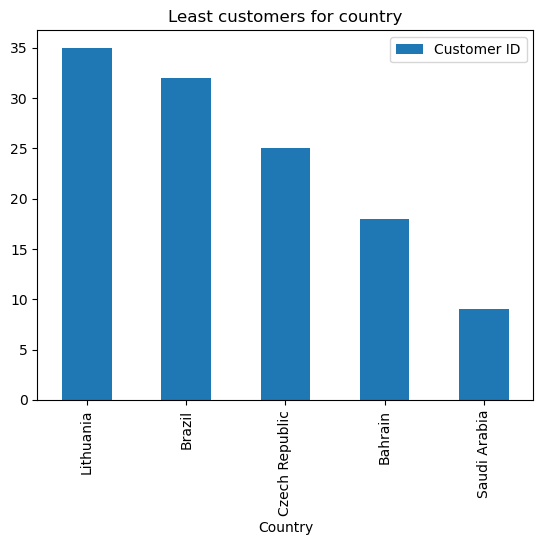

In [74]:
# Countries with less number of customers
cus_id[-5:].plot(kind = 'bar', title = 'Least customers for country')

### Answer-

1. We see that september to december we have very high sales
2. We can concentrate on improving the sales for the other 8 months
3. We find very less number of customers in Lithania, Brazil, Czech Republic, Bahrain, Saudi Arabia
4. We have very less sales for Lebanon, Brazil, RSA, Bahrain, Saudi Arabia. We can concentrate on improving their sales

We could improve the business by increasing the customers and sales point of view 

**Question:**
Revenue by Country: What is the total revenue generated for each country?

In [75]:
# Calculate the total revenue generated for each country
country_total_revenue = df.groupby('Country')['Revenue'].sum().reset_index()

# Sort the countries by total revenue in descending order
top_3_countries_by_revenue = country_total_revenue.sort_values(by='Revenue', ascending=False).head(3)

# Print the top 3 countries by revenue
print("Top 3 Countries by Revenue:")
print(top_3_countries_by_revenue)

Top 3 Countries by Revenue:
           Country      Revenue
36  United Kingdom  8979619.974
24     Netherlands   285446.340
10            EIRE   283140.520


**Question:**
Time Period Analysis: What is the overall revenue trend over time? (You can plot the revenue by month or year to visualize trends.)

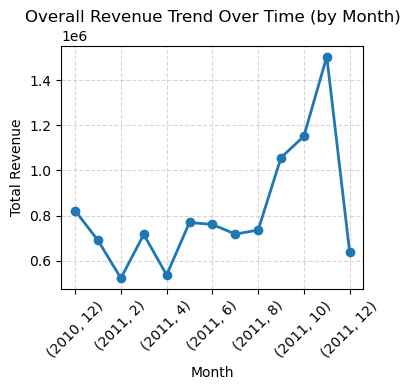

Year  Month
2010  12        821452.730
2011  1         689811.610
      2         522545.560
      3         716215.260
      4         536968.491
      5         769296.610
      6         760547.010
      7         718076.121
      8         735717.260
      9        1056435.192
      10       1151263.730
      11       1503866.780
      12        637790.330
Name: Revenue, dtype: float64


In [80]:
# Group by 'Year' and 'Month' and calculate the total revenue generated for each month
revenue_by_month = df.groupby(['Year', 'Month'])['Revenue'].sum()

# Create a simple line plot to visualize the revenue trend over time
plt.figure(figsize=(4, 4))
revenue_by_month.plot(marker='o', linestyle='-', linewidth=2)
plt.title('Overall Revenue Trend Over Time (by Month)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('revenue_trend.png')

# Show the plot
plt.show()
print(revenue_by_month)

**Question:**
Seasonal Trends: Are there any seasonal patterns in sales or revenue? (Analyze sales or revenue data over different months or seasons to identify trends.)

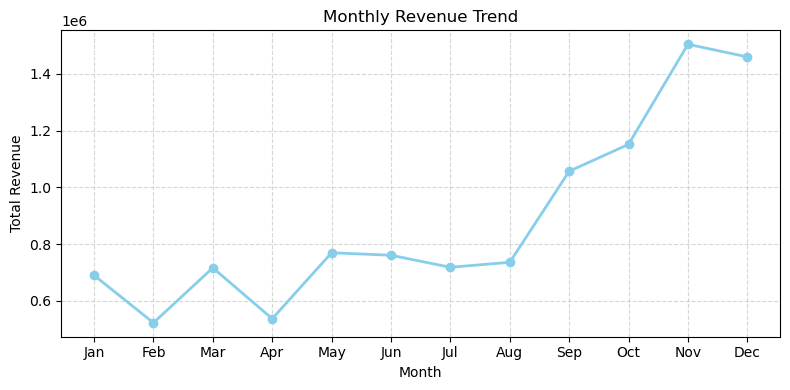

Month
1      689811.610
2      522545.560
3      716215.260
4      536968.491
5      769296.610
6      760547.010
7      718076.121
8      735717.260
9     1056435.192
10    1151263.730
11    1503866.780
12    1459243.060
Name: Revenue, dtype: float64


In [81]:
# Group by 'Month' and calculate the total revenue generated for each month
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Define month names for labeling the x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a line plot to visualize the monthly revenue trend
plt.figure(figsize=(8, 4))
plt.plot(month_names, monthly_revenue, marker='o', linestyle='-', linewidth=2, color='skyblue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()
print(monthly_revenue)

**Question:**
Peak Sales Hours: What are the peak hours of the day when most orders are placed? (Analyze invoice times to find the busiest hours.)

In [82]:
# Create an 'Hour' column from 'InvoiceDate'
df['Hour'] = df['InvoiceDate'].dt.hour

# Count the number of orders for each hour
hourly_order_counts = df['Hour'].value_counts()

# Find the peak hour(s) when most orders are placed
peak_hours = hourly_order_counts[hourly_order_counts == hourly_order_counts.max()]

# Print the peak hour(s) and the corresponding number of orders
print("Peak Hour(s) for Order Placement:")
print(peak_hours)

Peak Hour(s) for Order Placement:
Hour
12    76237
Name: count, dtype: int64


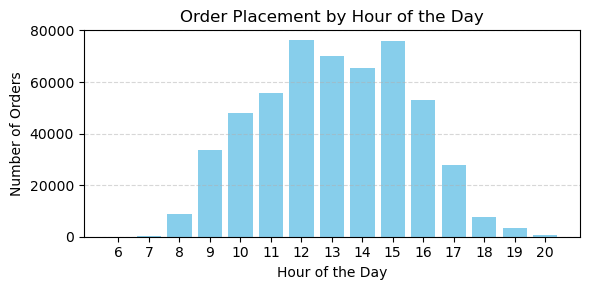

Hour
12    76237
15    76045
13    70188
14    65564
11    55761
16    53220
10    47803
9     33790
17    27661
8      8804
18     7731
19     3428
20      778
7       379
6         1
Name: count, dtype: int64


In [84]:
# Create a bar plot to visualize the peak hours
plt.figure(figsize=(6, 3))
plt.bar(hourly_order_counts.index, hourly_order_counts.values, color='skyblue')
plt.title('Order Placement by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(hourly_order_counts.index)
plt.tight_layout()
plt.savefig('revenue_trend.png')

# Show the plot
plt.show()
print(hourly_order_counts)

**Question:** 
Weekday vs. Weekend Sales: Are there differences in sales or revenue between weekdays and weekends?

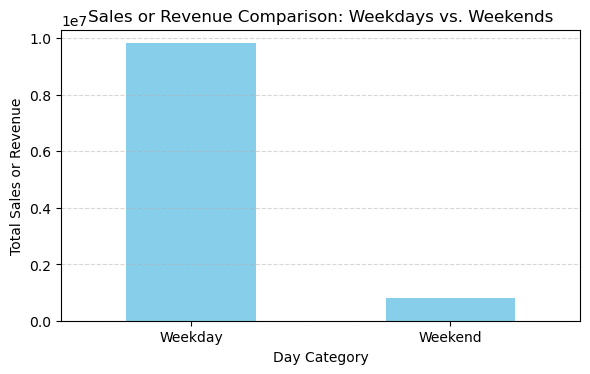

DayCategory
Weekday    9813195.903
Weekend     806790.781
Name: Revenue, dtype: float64


In [86]:
# Create a new column 'DayOfWeekName' to represent the day of the week as a name (e.g., 'Monday', 'Tuesday', etc.)
df['DayOfWeekName'] = df['InvoiceDate'].dt.strftime('%A')

# Define a function to categorize days into 'Weekday' or 'Weekend'
def categorize_day(day_name):
    if day_name in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

# Apply the categorization function to create a new column 'DayCategory'
df['DayCategory'] = df['DayOfWeekName'].apply(categorize_day)

# Group by 'DayCategory' and calculate the total revenue for each category
revenue_by_day_category = df.groupby('DayCategory')['Revenue'].sum()

# Create a bar plot to visualize the differences in sales or revenue between weekdays and weekends
plt.figure(figsize=(6, 4))
revenue_by_day_category.plot(kind='bar', color='skyblue')
plt.title('Sales or Revenue Comparison: Weekdays vs. Weekends')
plt.xlabel('Day Category')
plt.ylabel('Total Sales or Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('revenue_trend.png')

# Show the plot
plt.show()

print(revenue_by_day_category)

**Question:** 
Holiday and Event Impact: How do holidays or special events impact sales and revenue? (Analyze data around specific holiday periods.)

In [89]:
# Define the holiday or event periods you want to analyze
holiday_periods = [
    {'name': 'Christmas', 'start_date': '2010-12-01', 'end_date': '2010-12-31'},
    {'name': 'New Year', 'start_date': '2010-12-31', 'end_date': '2011-01-01'},
    # Add more holiday periods or events as needed
]

# Create an empty list to store DataFrames
holiday_analysis_list = []

# Calculate sales and revenue metrics for each holiday or event
for period in holiday_periods:
    start_date = pd.to_datetime(period['start_date'])
    end_date = pd.to_datetime(period['end_date'])
    
    # Filter data for the specific holiday or event period
    holiday_data = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)]
    
    # Calculate total sales and revenue for the holiday period
    total_sales = holiday_data['Quantity'].sum()
    total_revenue = (holiday_data['Quantity'] * holiday_data['UnitPrice']).sum()
    
    # Create a DataFrame for the holiday period
    holiday_df = pd.DataFrame({'Holiday': [period['name']], 'Total Sales': [total_sales], 'Total Revenue': [total_revenue]})
    
    # Append the DataFrame to the list
    holiday_analysis_list.append(holiday_df)

# Concatenate all DataFrames in the list into one DataFrame
holiday_analysis = pd.concat(holiday_analysis_list, ignore_index=True)

# Display the results
print(holiday_analysis)


     Holiday  Total Sales  Total Revenue
0  Christmas       357048      821452.73
1   New Year            0           0.00


<h2> RFM Analysis</h2>

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

- **Recency, Frequency, Monetary Value (RFM):** A marketing analysis tool used to identify a firm's best clients based on the nature of their spending habits.
- **RFM Analysis:** Evaluates clients and customers by scoring them in three categories:
  - *Recency:* How recently they've made a purchase.
  - *Frequency:* How often they buy.
  - *Monetary Value:* The size of their purchases.
- **RFM analysis helps firms in the following ways:**
  - Reasonably predict which customers are likely to purchase their products again.
  - Determine how much revenue comes from new (versus repeat) clients.
  - Develop strategies to turn occasional buyers into habitual ones.


![Sample Image](RFM.png)


In [91]:
df.InvoiceDate.unique()

<DatetimeArray>
['2010-12-01 08:26:00', '2010-12-01 08:28:00', '2010-12-01 08:34:00',
 '2010-12-01 08:35:00', '2010-12-01 08:45:00', '2010-12-01 09:00:00',
 '2010-12-01 09:01:00', '2010-12-01 09:02:00', '2010-12-01 09:09:00',
 '2010-12-01 09:32:00',
 ...
 '2011-12-09 12:09:00', '2011-12-09 12:16:00', '2011-12-09 12:19:00',
 '2011-12-09 12:20:00', '2011-12-09 12:21:00', '2011-12-09 12:23:00',
 '2011-12-09 12:25:00', '2011-12-09 12:31:00', '2011-12-09 12:49:00',
 '2011-12-09 12:50:00']
Length: 19990, dtype: datetime64[ns]

In [92]:
today = "2012-01-01"
today = pd.to_datetime(today)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [93]:
rec_table = df.groupby(["CustomerID"]).agg({"InvoiceDate": lambda x: ((today - x.max()).days)})
rec_table.columns =['Recency']



In [94]:
rec_table = df.groupby(["CustomerID"]).agg({"InvoiceDate": lambda x: ((today - x.max()).days)})
rec_table.columns = ['Recency']  # Rename the column to 'Recency'
rec_table.reset_index(inplace=True)  # Reset the index to include 'CustomerID'



In [95]:
rec_table.head()

,CustomerID,Recency
0,12346.0,347
1,12347.0,24
2,12348.0,97
3,12349.0,40
4,12350.0,332


In [96]:
freq_table = df.drop_duplicates(subset = "InvoiceNo").groupby(["CustomerID"])[["InvoiceNo"]].count()
freq_table.columns = ["Frequency"]
freq_table.reset_index(inplace=True)
freq_table.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [97]:
monetary_table = df.groupby(["CustomerID"])[["Revenue"]].sum()
monetary_table.columns = ["Monetary"]
monetary_table.reset_index(inplace=True)
monetary_table.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [98]:
rfm_data = pd.concat([rec_table, freq_table, monetary_table], axis = 1)
rfm_data.head()

,CustomerID,Recency,CustomerID,Frequency,CustomerID,Monetary
0,12346.0,347,12346.0,1,12346.0,77183.60
1,12347.0,24,12347.0,7,12347.0,4310.00
2,12348.0,97,12348.0,4,12348.0,1797.24
3,12349.0,40,12349.0,1,12349.0,1757.55
4,12350.0,332,12350.0,1,12350.0,334.40


In [99]:
rfm_data = pd.merge(rec_table, freq_table, on='CustomerID', how='inner')
rfm_data = pd.merge(rfm_data, monetary_table, on='CustomerID', how='inner')


In [100]:
rfm_data

,CustomerID,Recency,Frequency,Monetary
0,12346.0,347,1,77183.60
1,12347.0,24,7,4310.00
2,12348.0,97,4,1797.24
3,12349.0,40,1,1757.55
4,12350.0,332,1,334.40
...,...,...,...,...
4334,18280.0,299,1,180.60
4335,18281.0,202,1,80.82
4336,18282.0,29,2,178.05
4337,18283.0,25,16,2045.53


In [101]:
rfm_data.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,114.041484,4.271952,2048.215924
std,1721.889758,100.007757,7.705493,8984.248352
min,12346.000000,22.000000,1.000000,0.000000
25%,13812.500000,39.000000,1.000000,306.455000
50%,15299.000000,72.000000,2.000000,668.560000
75%,16778.500000,163.500000,5.000000,1660.315000
max,18287.000000,395.000000,210.000000,280206.020000


C:\Users\Pita ji\AppData\Local\Temp\ipykernel_10724\2796059284.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sn.distplot(rfm_data['Recency'])
C:\Users\Pita ji\AppData\Local\Temp\ipykernel_10724\2796059284.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sn.distplot(rfm

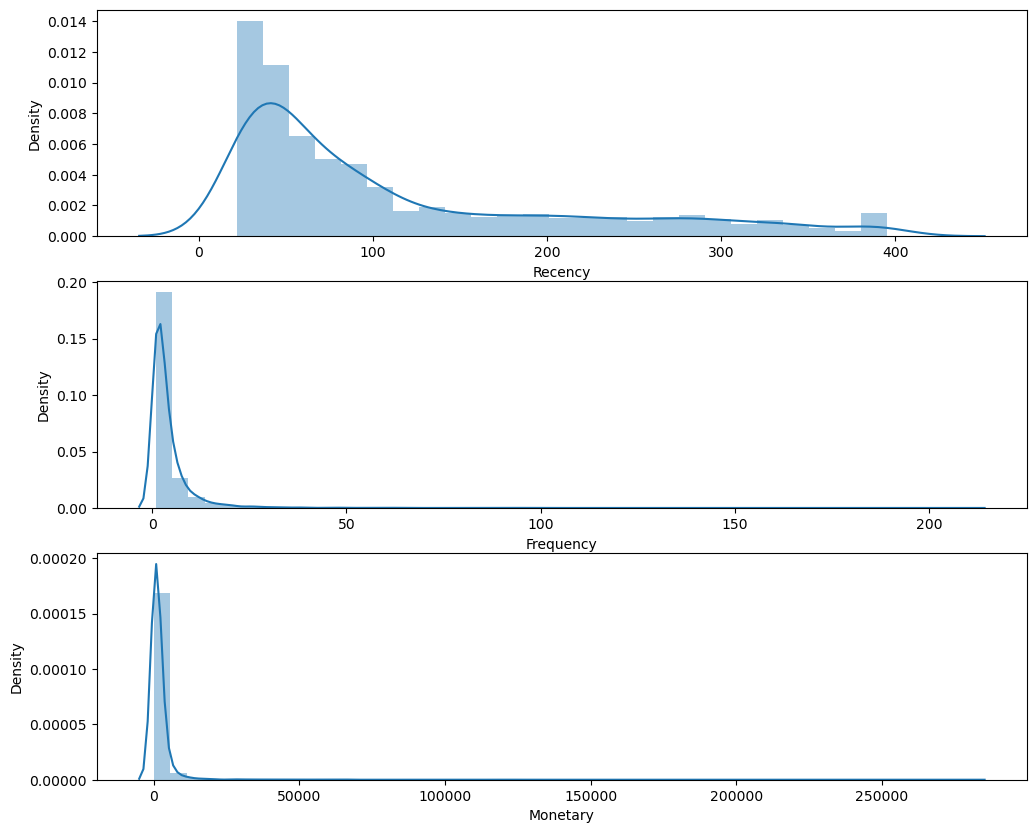

In [103]:
plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sn.distplot(rfm_data['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sn.distplot(rfm_data['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sn.distplot(rfm_data['Monetary'])

# Show the plot
plt.show()

In [104]:
rfm_data['R_rank'] = rfm_data['Recency'].rank(ascending=False)
rfm_data['F_rank'] = rfm_data['Frequency'].rank(ascending=True)
rfm_data['M_rank'] = rfm_data['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_data['R_rank_norm'] = (rfm_data['R_rank']/rfm_data['R_rank'].max())*100
rfm_data['F_rank_norm'] = (rfm_data['F_rank']/rfm_data['F_rank'].max())*100
rfm_data['M_rank_norm'] = (rfm_data['F_rank']/rfm_data['M_rank'].max())*100
 
rfm_data.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,347,1,77183.60,3.759833,17.227472,17.227472
1,12347.0,24,7,4310.00,96.170754,85.526619,85.526619
2,12348.0,97,4,1797.24,38.084220,69.854805,69.854805
3,12349.0,40,1,1757.55,74.259602,17.227472,17.227472
4,12350.0,332,1,334.40,5.263767,17.227472,17.227472


In [105]:
rfm_data['RFM_Score'] = 0.15*rfm_data['R_rank_norm']+0.28 * \
    rfm_data['F_rank_norm']+0.57*rfm_data['M_rank_norm']
rfm_data['RFM_Score'] *= 0.05
rfm_data = rfm_data.round(2)
# rfm_data[['CustomerID', 'RFM_Score']].head(7)

In [106]:
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,12346.0,347,1,77183.60,3.76,17.23,17.23,0.76
1,12347.0,24,7,4310.00,96.17,85.53,85.53,4.36
2,12348.0,97,4,1797.24,38.08,69.85,69.85,3.25
3,12349.0,40,1,1757.55,74.26,17.23,17.23,1.29
4,12350.0,332,1,334.40,5.26,17.23,17.23,0.77


Scaling the data for clustering.

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

C:\Users\Pita ji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pita ji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pita ji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pita ji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

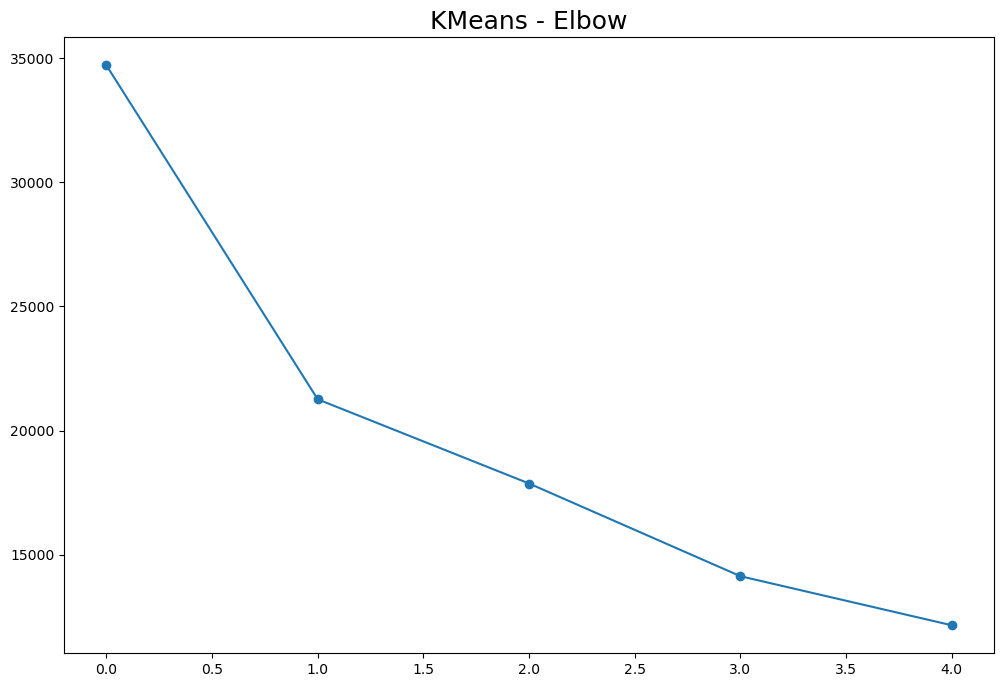

In [108]:
inertia = []

from sklearn.cluster import KMeans
for i in np.arange(1,6):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (12,8))    
plt.plot(inertia, marker = "o")
plt.title("KMeans - Elbow", fontsize = 18);

In [109]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(rfm_scaled)
rfm_data["Cluster_No"] = (kmeans.labels_ + 1)

C:\Users\Pita ji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [110]:
rfm_data

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Cluster_No
0,12346.0,347,1,77183.60,3.76,17.23,17.23,0.76,2
1,12347.0,24,7,4310.00,96.17,85.53,85.53,4.36,3
2,12348.0,97,4,1797.24,38.08,69.85,69.85,3.25,3
3,12349.0,40,1,1757.55,74.26,17.23,17.23,1.29,1
4,12350.0,332,1,334.40,5.26,17.23,17.23,0.77,2
...,...,...,...,...,...,...,...,...,...
4334,18280.0,299,1,180.60,8.21,17.23,17.23,0.79,2
4335,18281.0,202,1,80.82,19.90,17.23,17.23,0.88,2
4336,18282.0,29,2,178.05,88.84,44.07,44.07,2.54,1
4337,18283.0,25,16,2045.53,94.04,96.40,96.40,4.80,3


In [111]:
rfm_data.groupby(["Cluster_No"])[["Recency", "Frequency", "Monetary"]].mean()

,Recency,Frequency,Monetary
Cluster_No,,,
1,77.477137,1.644135,600.555991
2,267.695283,1.342453,577.700472
3,53.579128,7.398509,2945.601703
4,27.461538,66.500000,85826.078077


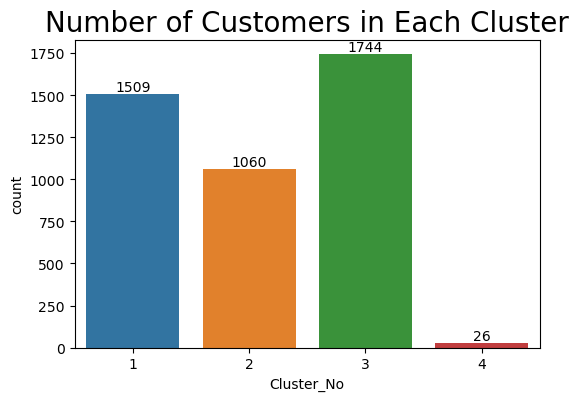

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data in a DataFrame called 'df'
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=rfm_data, x='Cluster_No')
plt.title("Number of Customers in Each Cluster", fontsize=20)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', label_type='edge')

plt.show()

In [113]:
rfm_data

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Cluster_No
0,12346.0,347,1,77183.60,3.76,17.23,17.23,0.76,2
1,12347.0,24,7,4310.00,96.17,85.53,85.53,4.36,3
2,12348.0,97,4,1797.24,38.08,69.85,69.85,3.25,3
3,12349.0,40,1,1757.55,74.26,17.23,17.23,1.29,1
4,12350.0,332,1,334.40,5.26,17.23,17.23,0.77,2
...,...,...,...,...,...,...,...,...,...
4334,18280.0,299,1,180.60,8.21,17.23,17.23,0.79,2
4335,18281.0,202,1,80.82,19.90,17.23,17.23,0.88,2
4336,18282.0,29,2,178.05,88.84,44.07,44.07,2.54,1
4337,18283.0,25,16,2045.53,94.04,96.40,96.40,4.80,3


**Insights/Recommendation**
**Premium Customers:**
- Cluster 4: These customers have the highest monetary values, indicating they are high spenders.
- Recommendation: Continue providing premium services, offer exclusive deals, and engage them with loyalty programs to maintain their loyalty.

**Mid-level Customers:**
- Cluster 2: While they have relatively high frequency and monetary values, they are not as recent as Cluster 4.
- Recommendation: Provide regular offers and discounts to keep them engaged and encourage repeat purchases.

**Potential Loyalists:**
- Cluster 1: These customers have made purchases relatively recently, but their frequency and monetary values are moderate.
- Recommendation: Engage them with personalized recommendations and incentives to increase their frequency and spending.

**Customers Needing Attention:**
- Cluster 3: These customers have a low frequency and monetary value, and their recency is also not very recent.
- Recommendation: Target them with win-back campaigns and incentives to increase their spending and frequency.

Rating Customer based upon the RFM score

**rfm score >4.5 : Top Customer
4.5 > rfm score > 4 : High Value Customer
4>rfm score >3 : Medium value customer
3>rfm score>1.6 : Low-value customer
rfm score<1.6 :Lost Customer**

In [114]:
rfm_data["Customer_segment"] = np.where(rfm_data['RFM_Score'] >
                                      4.5, "Top Customers", 
                                      (np.where(
                                        rfm_data['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_data['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_data['RFM_Score'] > 1.6, 
                            'Low Value Customers', 'Lost Customers'))))))
rfm_data
# rfm_data[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Cluster_No,Customer_segment
0,12346.0,347,1,77183.60,3.76,17.23,17.23,0.76,2,Lost Customers
1,12347.0,24,7,4310.00,96.17,85.53,85.53,4.36,3,High value Customer
2,12348.0,97,4,1797.24,38.08,69.85,69.85,3.25,3,Medium Value Customer
3,12349.0,40,1,1757.55,74.26,17.23,17.23,1.29,1,Lost Customers
4,12350.0,332,1,334.40,5.26,17.23,17.23,0.77,2,Lost Customers
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,299,1,180.60,8.21,17.23,17.23,0.79,2,Lost Customers
4335,18281.0,202,1,80.82,19.90,17.23,17.23,0.88,2,Lost Customers
4336,18282.0,29,2,178.05,88.84,44.07,44.07,2.54,1,Low Value Customers
4337,18283.0,25,16,2045.53,94.04,96.40,96.40,4.80,3,Top Customers


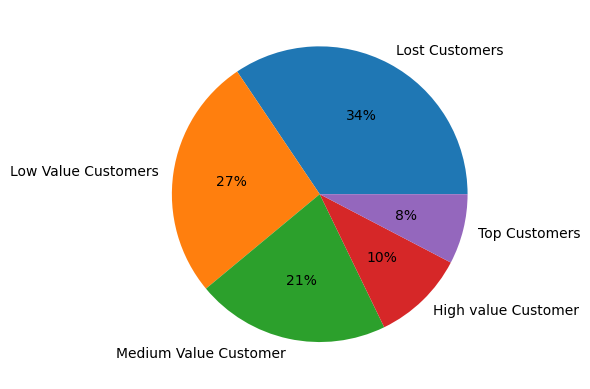

In [115]:
plt.pie(rfm_data.Customer_segment.value_counts(),
        labels=rfm_data.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

**Lost Customers (34%):**
- Implement reactivation campaigns to win back these customers. Offer them incentives, discounts, and personalized promotions to encourage them to return.

**Top Customers (8%):**
- Continue providing top-notch services and exclusive benefits to maintain their loyalty. Offer them VIP experiences and early access to new products.

**High-Value Customers (10%):**
- Recognize and reward their loyalty with loyalty programs and special offers. Encourage them to refer friends and family to expand your customer base.

**Medium-Value Customers (21%):**
- Provide regular discounts, offers, and incentives to keep them engaged. Implement a customer retention strategy to prevent them from moving to the low-value segment.

**Low-Value Customers (27%):**
- Target these customers with upselling and cross-selling strategies. Offer them personalized recommendations to increase their spending and move them up to the medium or high-value segments.

These recommendations are designed to help you optimize customer retention, increase customer lifetime value, and grow your business by addressing the specific needs of each customer segment.


In [116]:
rfm_data.to_csv('RFM.csv', sep='\t', index=False,header=True)

<h2> Market Basket Analysis</h2>

Association rules are generated using the Apriori algorithm, which is a popular algorithm for discovering interesting relationships or associations among items in a dataset. Association rule mining is commonly used in market basket analysis, where the goal is to find associations between items frequently purchased together.

The generated association rules provide insights into the relationships between different items or itemsets in the dataset. Each association rule consists of two parts: the antecedent (or left-hand side) and the consequent (or right-hand side). The antecedent represents the item(s) or itemset(s) that act as a condition or premise, while the consequent represents the item(s) or itemset(s) that are predicted or inferred from the antecedent.

The association rules are evaluated based on different metrics, such as support, confidence, lift, leverage, and conviction. These metrics provide measures of the interestingness or strength of the rules.

- **Support:** Measures the proportion of transactions in the dataset that contain both the antecedent and the consequent.
- **Confidence:** Measures the conditional probability of the consequent given the antecedent.
- **Lift:** Measures the ratio of observed support to expected support, indicating the strength of the association between the antecedent and the consequent.
- **Leverage:** Measures the difference between the observed support and the expected support, indicating the significance of the association.
- **Conviction:** Measures the ratio of the expected confidence to the observed confidence, indicating the degree of dependency between the antecedent and the consequent.


By examining the association rules, you can identify interesting relationships, co-occurrences, or patterns among items, which can be used for various purposes such as product recommendation, market segmentation, or inventory management.

To generate the association rules, we use the Apriori algorithm with a minimum support threshold of 0.05 (5%). This ensures that only itemsets with sufficient frequency in the dataset are considered.

Let's explore the generated association rules:



![Sample Image](download.png)

In [117]:
data_apr = df.groupby(["InvoiceNo", "Description"])[["Quantity"]].sum(
).unstack().reset_index().fillna(0).set_index("InvoiceNo")

In [118]:
data_apr.head()

Quantity                                 \
Description    20713  4 PURPLE FLOCK DINNER CANDLES   
InvoiceNo                                             
536365           0.0                            0.0   
536366           0.0                            0.0   
536367           0.0                            0.0   
536368           0.0                            0.0   
536369           0.0                            0.0   

                                                               \
Description  50'S CHRISTMAS GIFT BAG LARGE  DOLLY GIRL BEAKER   
InvoiceNo                                                       
536365                                 0.0                0.0   
536366                                 0.0                0.0   
536367                                 0.0                0.0   
536368                                 0.0                0.0   
536369                                 0.0                0.0   

                                                                       \
Description  I LOVE LONDON MINI BACKPACK  I LOVE LONDON MINI RUCKSACK   
InvoiceNo                                                               
536365                               0.0                          0.0   
536366                               0.0                          0.0   
536367                               0.0                          0.0   
536368                               0.0                          0.0   
536369                               0.0                          0.0   

                                                                  \
Description  NINE DRAWER OFFICE TIDY  OVAL WALL MIRROR DIAMANTE    
InvoiceNo                                                          
536365                           0.0                         0.0   
536366                           0.0                         0.0   
536367                           0.0                         0.0   
536368                           0.0                         0.0   
536369                           0.0                         0.0   

                                                                       ...  \
Description  RED SPOT GIFT BAG LARGE  SET 2 TEA TOWELS I LOVE LONDON   ...   
InvoiceNo                                                              ...   
536365                           0.0                              0.0  ...   
536366                           0.0                              0.0  ...   
536367                           0.0                              0.0  ...   
536368                           0.0                              0.0  ...   
536369                           0.0                              0.0  ...   

                                                                         \
Description wrongly coded 20713 wrongly coded 23343 wrongly coded-23343   
InvoiceNo                                                                 
536365                      0.0                 0.0                 0.0   
536366                      0.0                 0.0                 0.0   
536367                      0.0                 0.0                 0.0   
536368                      0.0                 0.0                 0.0   
536369                      0.0                 0.0                 0.0   

                                                                             \
Description wrongly marked wrongly marked 23343 wrongly marked carton 22804   
InvoiceNo                                                                     
536365                 0.0                  0.0                         0.0   
536366                 0.0                  0.0                         0.0   
536367                 0.0                  0.0                         0.0   
536368                 0.0                  0.0                         0.0   
536369                 0.0                  0.0                         0.0   

                                                             

In [119]:
def num(x):
    if x <= 0:
        return 0
    elif x >=1:
        return 1
basket_new = data_apr.applymap(num)

In [120]:
basket_new.nunique()

          Description                   
Quantity  20713                             1
           4 PURPLE FLOCK DINNER CANDLES    2
           50'S CHRISTMAS GIFT BAG LARGE    2
           DOLLY GIRL BEAKER                2
           I LOVE LONDON MINI BACKPACK      2
                                           ..
          wrongly marked carton 22804       1
          wrongly marked. 23343 in box      1
          wrongly sold (22719) barcode      2
          wrongly sold as sets              1
          wrongly sold sets                 1
Length: 4207, dtype: int64

In [121]:
from mlxtend.frequent_patterns import apriori

apr = apriori(basket_new, min_support = 0.02, use_colnames = True)
apr.sort_values(by = "support", ascending = False)

C:\Users\Pita ji\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
260,0.109656,"((Quantity, WHITE HANGING HEART T-LIGHT HOLDER))"
100,0.101504,"((Quantity, JUMBO BAG RED RETROSPOT))"
193,0.096507,"((Quantity, REGENCY CAKESTAND 3 TIER))"
154,0.081805,"((Quantity, PARTY BUNTING))"
125,0.075885,"((Quantity, LUNCH BAG RED RETROSPOT))"
...,...,...
296,0.020087,"((Quantity, JUMBO BAG RED RETROSPOT), (Quantit..."
310,0.020087,"((Quantity, JUMBO STORAGE BAG SKULLS), (Quanti..."
61,0.020039,"((Quantity, FELTCRAFT PRINCESS LOLA DOLL))"
67,0.020039,"((Quantity, GINGHAM HEART DECORATION))"


In [122]:
apr

,support,itemsets
0,0.022707,"((Quantity, 3 STRIPEY MICE FELTCRAFT))"
1,0.023484,"((Quantity, 4 TRADITIONAL SPINNING TOPS))"
2,0.046337,"((Quantity, 6 RIBBONS RUSTIC CHARM))"
3,0.021203,"((Quantity, 60 CAKE CASES DOLLY GIRL DESIGN))"
4,0.029985,"((Quantity, 60 CAKE CASES VINTAGE CHRISTMAS))"
...,...,...
347,0.024551,"((Quantity, RED RETROSPOT CHARLOTTE BAG), (Qua..."
348,0.025473,"((Quantity, ROSES REGENCY TEACUP AND SAUCER ),..."
349,0.026152,"((Quantity, WOODEN FRAME ANTIQUE WHITE ), (Qua..."
350,0.026298,"((Quantity, GREEN REGENCY TEACUP AND SAUCER), ..."


In [123]:
from mlxtend.frequent_patterns import association_rules
end = association_rules(apr, metric = "lift", min_threshold = 1)
end.sort_values(by = "confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
150,"((Quantity, ROSES REGENCY TEACUP AND SAUCER ),...","((Quantity, GREEN REGENCY TEACUP AND SAUCER))",0.029064,0.049248,0.026298,0.904841,18.373184,0.024867,9.991237,0.973877
149,"((Quantity, GREEN REGENCY TEACUP AND SAUCER), ...","((Quantity, ROSES REGENCY TEACUP AND SAUCER ))",0.030713,0.051722,0.026298,0.856240,16.554511,0.024709,6.596260,0.969366
23,"((Quantity, PINK REGENCY TEACUP AND SAUCER))","((Quantity, GREEN REGENCY TEACUP AND SAUCER))",0.037166,0.049248,0.030713,0.826371,16.779804,0.028883,5.475760,0.976705
155,"((Quantity, JUMBO STORAGE BAG SUKI), (Quantity...","((Quantity, JUMBO BAG RED RETROSPOT))",0.024988,0.101504,0.020039,0.801942,7.900583,0.017502,4.536523,0.895811
137,"((Quantity, PINK REGENCY TEACUP AND SAUCER))","((Quantity, ROSES REGENCY TEACUP AND SAUCER ))",0.037166,0.051722,0.029064,0.781984,15.118853,0.027141,4.349584,0.969905
...,...,...,...,...,...,...,...,...,...,...
74,"((Quantity, JUMBO BAG RED RETROSPOT))","((Quantity, RECYCLING BAG RETROSPOT ))",0.101504,0.036293,0.020136,0.198375,5.465914,0.016452,1.202191,0.909351
69,"((Quantity, JUMBO BAG RED RETROSPOT))","((Quantity, JUMBO STORAGE BAG SKULLS))",0.101504,0.034207,0.020087,0.197897,5.785322,0.016615,1.204076,0.920593
40,"((Quantity, JUMBO BAG RED RETROSPOT))","((Quantity, JUMBO BAG ALPHABET))",0.101504,0.043959,0.020087,0.197897,4.501823,0.015625,1.191917,0.865744
158,"((Quantity, JUMBO BAG RED RETROSPOT))","((Quantity, JUMBO STORAGE BAG SUKI), (Quantity...",0.101504,0.024988,0.020039,0.197419,7.900583,0.017502,1.214845,0.972099


In [124]:
MBA=pd.concat([end["antecedents"], end["consequents"], end["confidence"]], axis = 1
         ).sort_values(by = "confidence", ascending = False)[0:10]
MBA

,antecedents,consequents,confidence
150,"((Quantity, ROSES REGENCY TEACUP AND SAUCER ),...","((Quantity, GREEN REGENCY TEACUP AND SAUCER))",0.904841
149,"((Quantity, GREEN REGENCY TEACUP AND SAUCER), ...","((Quantity, ROSES REGENCY TEACUP AND SAUCER ))",0.856240
23,"((Quantity, PINK REGENCY TEACUP AND SAUCER))","((Quantity, GREEN REGENCY TEACUP AND SAUCER))",0.826371
155,"((Quantity, JUMBO STORAGE BAG SUKI), (Quantity...","((Quantity, JUMBO BAG RED RETROSPOT))",0.801942
137,"((Quantity, PINK REGENCY TEACUP AND SAUCER))","((Quantity, ROSES REGENCY TEACUP AND SAUCER ))",0.781984
26,"((Quantity, GREEN REGENCY TEACUP AND SAUCER))","((Quantity, ROSES REGENCY TEACUP AND SAUCER ))",0.756650
27,"((Quantity, ROSES REGENCY TEACUP AND SAUCER ))","((Quantity, GREEN REGENCY TEACUP AND SAUCER))",0.720450
21,"((Quantity, GARDENERS KNEELING PAD CUP OF TEA ))","((Quantity, GARDENERS KNEELING PAD KEEP CALM ))",0.720317
153,"((Quantity, PINK REGENCY TEACUP AND SAUCER))","((Quantity, ROSES REGENCY TEACUP AND SAUCER ),...",0.707572
148,"((Quantity, ROSES REGENCY TEACUP AND SAUCER ),...","((Quantity, PINK REGENCY TEACUP AND SAUCER))",0.705729


**Recommendation**

Look at the confidences, it indicates the possibility that customers buying the X product will buy the Y product. We need to make a decision for them. Maybe in our website, when the customer click on first one, we need to show them the other item.

For example: When our customer clicks on PINK REGENCY TEACUP AND SAUCER, we need to show them GREEN REGENCY TEACUP AND SAUCER and maximize our profit.

In [125]:
MBA.to_csv('MBA.csv', sep='\t', index=False,header=True)

In [126]:
end.to_csv('end.csv', sep='\t', index=False,header=True)

In [130]:
# Filter association rules for cross-selling opportunities
cross_selling_rules = end[(end['antecedents'].apply(lambda x: len(x) == 1)) & (end['consequents'].apply(lambda x: len(x) == 1))]

# Sort rules based on confidence and support
cross_selling_rules = cross_selling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top cross-selling recommendations
top_cross_selling = cross_selling_rules.head(5)

# Filter association rules for upselling opportunities
upselling_rules = end[(end['antecedents'].apply(lambda x: len(x) == 1)) & (end['consequents'].apply(lambda x: len(x) > 1))]

# Sort rules based on confidence and support
upselling_rules = upselling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top upselling recommendations
top_upselling = upselling_rules.head(5)

# Display cross-selling recommendations
print("Cross-Selling Recommendations:")
for idx, row in top_cross_selling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    print(f"Customers who bought '{antecedent}' also bought '{consequent}'.")

# Display upselling recommendations
print("\nUpselling Recommendations:")
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = [str(item) for item in list(row['consequents'])]
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")



Cross-Selling Recommendations:
Customers who bought '('Quantity', 'PINK REGENCY TEACUP AND SAUCER')' also bought '('Quantity', 'GREEN REGENCY TEACUP AND SAUCER')'.
Customers who bought '('Quantity', 'PINK REGENCY TEACUP AND SAUCER')' also bought '('Quantity', 'ROSES REGENCY TEACUP AND SAUCER ')'.
Customers who bought '('Quantity', 'GREEN REGENCY TEACUP AND SAUCER')' also bought '('Quantity', 'ROSES REGENCY TEACUP AND SAUCER ')'.
Customers who bought '('Quantity', 'ROSES REGENCY TEACUP AND SAUCER ')' also bought '('Quantity', 'GREEN REGENCY TEACUP AND SAUCER')'.
Customers who bought '('Quantity', 'GARDENERS KNEELING PAD CUP OF TEA ')' also bought '('Quantity', 'GARDENERS KNEELING PAD KEEP CALM ')'.

Upselling Recommendations:
For customers who bought '('Quantity', 'PINK REGENCY TEACUP AND SAUCER')', recommend the following upgrades: ('Quantity', 'ROSES REGENCY TEACUP AND SAUCER '), ('Quantity', 'GREEN REGENCY TEACUP AND SAUCER').
For customers who bought '('Quantity', 'GREEN REGENCY TEA

In [134]:
# Display upselling recommendations
print("\nUpselling Recommendations:")
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = [str(item) for item in list(row['consequents'])]
    
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")



Upselling Recommendations:
For customers who bought '('Quantity', 'PINK REGENCY TEACUP AND SAUCER')', recommend the following upgrades: ('Quantity', 'ROSES REGENCY TEACUP AND SAUCER '), ('Quantity', 'GREEN REGENCY TEACUP AND SAUCER').
For customers who bought '('Quantity', 'GREEN REGENCY TEACUP AND SAUCER')', recommend the following upgrades: ('Quantity', 'ROSES REGENCY TEACUP AND SAUCER '), ('Quantity', 'PINK REGENCY TEACUP AND SAUCER').
For customers who bought '('Quantity', 'ROSES REGENCY TEACUP AND SAUCER ')', recommend the following upgrades: ('Quantity', 'GREEN REGENCY TEACUP AND SAUCER'), ('Quantity', 'PINK REGENCY TEACUP AND SAUCER').
For customers who bought '('Quantity', 'JUMBO STORAGE BAG SUKI')', recommend the following upgrades: ('Quantity', 'JUMBO BAG RED RETROSPOT'), ('Quantity', 'JUMBO BAG PINK POLKADOT').
For customers who bought '('Quantity', 'JUMBO BAG PINK POLKADOT')', recommend the following upgrades: ('Quantity', 'JUMBO STORAGE BAG SUKI'), ('Quantity', 'JUMBO BAG

**Conclusion**

In summary, our project highlighted the substantial significance of association rules analysis, encompassing sales trend analysis and RFM-based customer segmentation, with applications spanning various domains such as marketing, product recommendations, cross-selling strategies, and process optimization. By unraveling intricate item associations, we provided businesses with the tools to make data-driven decisions, fostering improved sales strategies, customer satisfaction, and marketing campaign refinement, ultimately driving substantial business growth. The combination of sales trend analysis and RFM segmentation allowed for a more holistic understanding of customer behavior and preferences, empowering businesses to tailor their strategies to meet specific needs and achieve remarkable results.